In [105]:
from importlib import reload
import h5py
import numpy as np
import arviz as az
import matplotlib.pyplot as plt
import matplotlib.patches as pt
import utility_functions
import meshio
import evaluations

In [106]:
point = np.array([80, 150])

sample_paths = [
    '/home/anne/Masterarbeit/masterarbeit/results/samples_2d_rad_l0.h5',
    '/home/anne/Masterarbeit/masterarbeit/results/samples_2d_rad_l1.h5',
    '/home/anne/Masterarbeit/masterarbeit/results/samples_2d_rad_l2.h5']

samples = []

for i in range(len(sample_paths)):
    fin = h5py.File(sample_paths[i])
    samples.append(np.array( fin['/samples'][0:2] ))
    fin.close()

fin = h5py.File('/home/anne/Masterarbeit/masterarbeit/results/samples_2d_rad_mlda.h5')
mlda_samples = np.array( fin['/samples'][0:2] )
fin.close()

path_meshs = [
        "data/mesh_20_1.msh",
        "data/mesh_20_2.msh",
        "data/mesh_20_3.msh"]

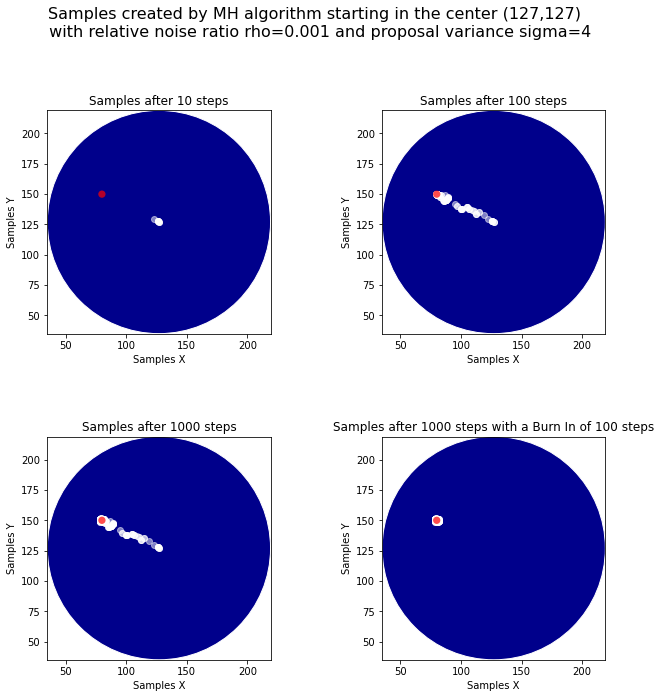

In [108]:
reload(evaluations)
s = samples[-1]

fig, ax = plt.subplots(2, 2, figsize=(10,11))
fig.subplots_adjust(wspace=.5)

evaluations.set_ax(ax[0,0],"darkblue")
ax[0,0].scatter(s[0, 0:10], s[1, 0:10], c='white', alpha=0.5)
evaluations.draw_point(ax[0,0],point,0.7)

evaluations.set_ax(ax[0,1],"darkblue")
ax[0,1].scatter(s[0, 0:100], s[1, 0:100], c='white', alpha=0.5)
evaluations.draw_point(ax[0,1],point,0.7)

evaluations.set_ax(ax[1,0],"darkblue")
ax[1,0].scatter(s[0, 0:1000], s[1, 0:1000], c='white', alpha=0.5)
evaluations.draw_point(ax[1,0],point,0.7)

evaluations.set_ax(ax[1,1],"darkblue")
ax[1,1].scatter(s[0, 100:1000], s[1, 100:1000], c='white', alpha=0.5)
evaluations.draw_point(ax[1,1],point,0.7)

fig.suptitle('Samples created by MH algorithm starting in the center (127,127) \n with relative noise ratio rho=0.001 and proposal variance sigma=4', fontsize=16)
ax[0,0].set_title('Samples after 10 steps')
ax[0,1].set_title('Samples after 100 steps')
ax[1,0].set_title('Samples after 1000 steps')
ax[1,1].set_title('Samples after 1000 steps with a Burn In of 100 steps')
plt.show()

Text(0.5, 1.0, 'Density after 1000 steps')

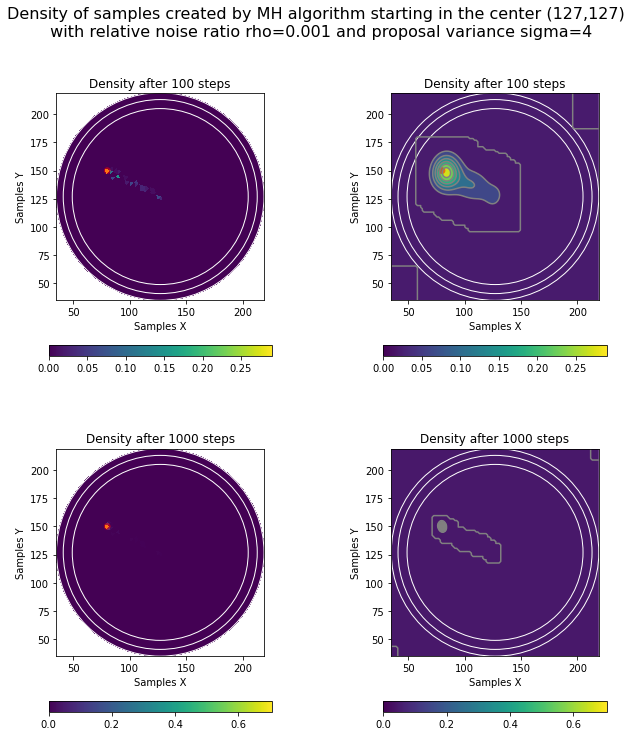

In [109]:
path_mesh = path_meshs[-1]
s = samples[-1]

fig, ax = plt.subplots(2, 2, figsize=(10,12))
fig.subplots_adjust(wspace=.5)

im = evaluations.draw_cells(path_mesh,s[:,0:100],ax[0,0])
plt.colorbar(im, ax=ax[0,0],orientation="horizontal")
evaluations.set_ax(ax[0,0])
evaluations.draw_point(ax[0,0],point,0.5)

evaluations.draw_densities(s[:,0:100],ax[0,1])
plt.colorbar(im, ax=ax[0,1],orientation="horizontal")
evaluations.set_ax(ax[0,1])
evaluations.draw_point(ax[0,1],point,0.5)

im = evaluations.draw_cells(path_mesh,s[:,0:1000],ax[1,0])
plt.colorbar(im, ax=ax[1,0],orientation="horizontal")
evaluations.set_ax(ax[1,0])
evaluations.draw_point(ax[1,0],point,0.5)

evaluations.draw_densities(s[:,0:1000],ax[1,1])
plt.colorbar(im, ax=ax[1,1],orientation="horizontal")
evaluations.set_ax(ax[1,1])
evaluations.draw_point(ax[1,1],point,0.5)

fig.suptitle('Density of samples created by MH algorithm starting in the center (127,127) \n with relative noise ratio rho=0.001 and proposal variance sigma=4', fontsize=16)
ax[0,0].set_title('Density after 100 steps')
ax[0,1].set_title('Density after 100 steps')
ax[1,0].set_title('Density after 1000 steps')
ax[1,1].set_title('Density after 1000 steps')

Text(0.5, 1.0, 'Level 3')

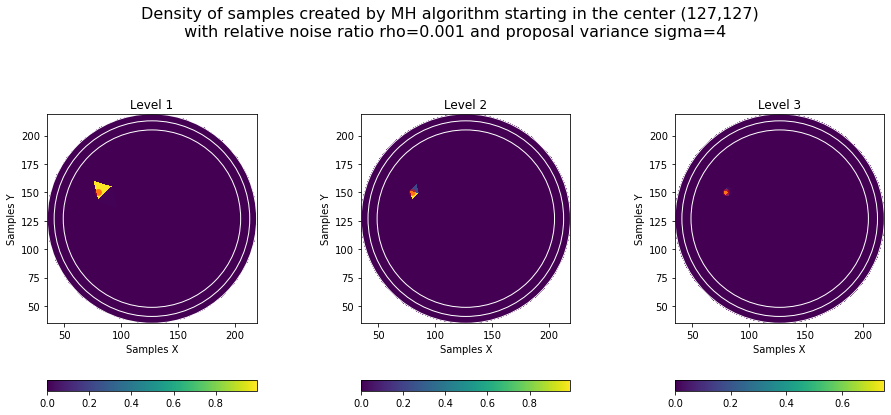

In [125]:
fig, ax = plt.subplots(1, 3, figsize=(15,7))
fig.subplots_adjust(wspace=.5)

im = evaluations.draw_cells(path_meshs[0],samples[0][:,100:1000],ax[0])
plt.colorbar(im, ax=ax[0],orientation="horizontal")
evaluations.set_ax(ax[0])
evaluations.draw_point(ax[0],point,0.5)

evaluations.draw_cells(path_meshs[1],samples[1][:,100:1000],ax[1])
plt.colorbar(im, ax=ax[1],orientation="horizontal")
evaluations.set_ax(ax[1])
evaluations.draw_point(ax[1],point,0.5)

im = evaluations.draw_cells(path_meshs[2],samples[2][:,100:1000],ax[2])
plt.colorbar(im, ax=ax[2],orientation="horizontal")
evaluations.set_ax(ax[2])
evaluations.draw_point(ax[2],point,0.5)

fig.suptitle('Density of samples created by MH algorithm starting in the center (127,127) \n with relative noise ratio rho=0.001 and proposal variance sigma=4', fontsize=16)
ax[0].set_title('Level 1')
ax[1].set_title('Level 2')
ax[2].set_title('Level 3')

Text(0.5, 1.0, 'Level 3')

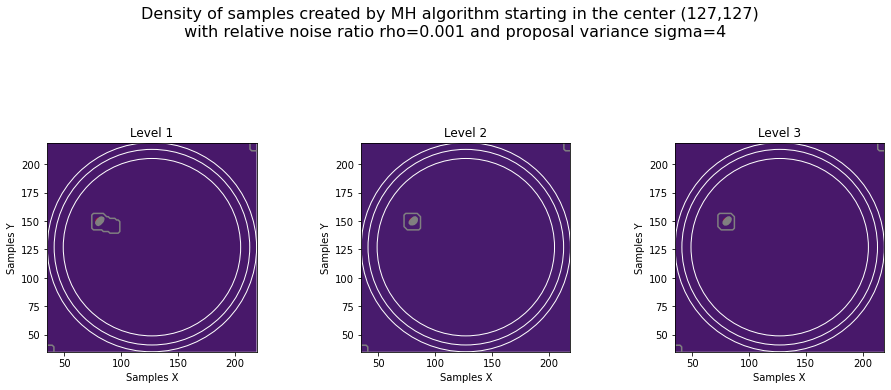

In [124]:
fig, ax = plt.subplots(1, 3, figsize=(15,7))
fig.subplots_adjust(wspace=.5)

evaluations.draw_densities(samples[0][:,100:1000],ax[0])
#plt.colorbar(im, ax=ax[0],orientation="horizontal")
evaluations.set_ax(ax[0])
evaluations.draw_point(ax[0],point,0.5)

evaluations.draw_densities(samples[1][:,100:1000],ax[1])
#plt.colorbar(im, ax=ax[1],orientation="horizontal")
evaluations.set_ax(ax[1])
evaluations.draw_point(ax[1],point,0.5)

evaluations.draw_densities(samples[2][:,100:1000],ax[2])
#plt.colorbar(im, ax=ax[2],orientation="horizontal")
evaluations.set_ax(ax[2])
evaluations.draw_point(ax[2],point,0.5)

fig.suptitle('Density of samples created by MH algorithm starting in the center (127,127) \n with relative noise ratio rho=0.001 and proposal variance sigma=4', fontsize=16)
ax[0].set_title('Level 1')
ax[1].set_title('Level 2')
ax[2].set_title('Level 3')